<a href="https://colab.research.google.com/github/sftSalman/transferLearning/blob/main/vehicle_detection_inceptionV3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files

In [3]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"salmanfarshi","key":"1e2dc4b648a326bb6b47a0937707aca1"}'}

In [4]:
! mkdir ~/.kaggle

In [5]:
! cp kaggle.json ~/.kaggle/

In [6]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

In [ ]:
# ! kaggle competitions download -c 'Vehicle Detection Image Set'



404 - Not Found


In [ ]:
# !kaggle datasets download -d brsdincer/vehicle-detection-image-set -p /content/sample_data/ --unzip

 88% 105M/119M [00:00<00:00, 245MB/s] 
100% 119M/119M [00:00<00:00, 203MB/s]


In [8]:
!kaggle datasets download -d brsdincer/vehicle-detection-image-set -p /content/

 88% 105M/119M [00:02<00:00, 51.8MB/s] 
100% 119M/119M [00:02<00:00, 46.8MB/s]


In [55]:
import os 
import zipfile 
import random 
import shutil 
import tensorflow as tf
from shutil import copyfile
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.preprocessing import image 
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras import layers
from tensorflow.keras.models import Model

In [10]:
local_zip = '/content/vehicle-detection-image-set.zip'
zip_ref   = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/new_data')
zip_ref.close()

In [11]:
source_path='/content/new_data/data'

In [12]:
source_path_vehicles = os.path.join(source_path,'vehicles')
source_path_non_vehicles = os.path.join(source_path,'non-vehicles')

In [13]:
len(os.listdir((source_path_vehicles)))

8792

In [14]:
len(os.listdir((source_path_non_vehicles)))

8968

In [15]:
root_dir= '/content/new_data/root'

In [16]:
if os.path.exists(root_dir):
  shutil.rmtree(root_dir)

In [17]:
def create_train_test_dirs(root_path):
  os.makedirs(os.path.join(f'{root_path}/training'))
  os.makedirs(os.path.join(f'{root_path}/training','vehicles'))
  os.makedirs(os.path.join(f'{root_path}/training','non-vehicles'))
  os.makedirs(os.path.join(f'{root_path}/testing'))
  os.makedirs(os.path.join(f'{root_path}/testing','vehicles'))
  os.makedirs(os.path.join(f'{root_path}/testing','non-vehicles'))


In [18]:

try:
  create_train_test_dirs(root_path=root_dir)
except FileExistsError:
  print("You should not be seeing this since the upper directory is removed beforehand")

In [19]:
for rootdir, dirs, files in os.walk(root_dir):
    for subdir in dirs:
        print(os.path.join(rootdir, subdir))

/content/new_data/root/training
/content/new_data/root/testing
/content/new_data/root/training/vehicles
/content/new_data/root/training/non-vehicles
/content/new_data/root/testing/vehicles
/content/new_data/root/testing/non-vehicles


In [20]:
def split_data(source,training,testing,split_size):
  shuffled_source = random.sample(os.listdir(source),len(os.listdir(source)))
  training_number = int(len(shuffled_source)*split_size)
  

  i = 0
  target = training
  for item in shuffled_source:
    item_source = os.path.join(source,item)
    if os.path.getsize(item_source)==0:
      print(f'{item} is zero length , so ignoring')
    else :
      copyfile(item_source,os.path.join(target,item))
      i += 1



    if i == training_number:
      target = testing

In [21]:
vehicles_source_dir = '/content/new_data/data/vehicles'
non_vehicles_source_dir = '/content/new_data/data/non-vehicles'

training_dir = '/content/new_data/root/training'
testing_dir = '/content/new_data/root/testing'

training_vehicles_dir = os.path.join(training_dir,'vehicles/')
testing_vehicles_dir = os.path.join(testing_dir,'non-vehicles/')

training_non_vehicles_dir = os.path.join(training_dir,'vehicles/')
testing_non_vehicles_dir = os.path.join(testing_dir,'non-vehicles/')

if len(os.listdir(training_vehicles_dir)) > 0:
  for file in os.scandir(training_vehicles_dir):
    os.remove(file.path)
if len(os.listdir(training_non_vehicles_dir)) > 0:
  for file in os.scandir(training_non_vehicles_dir):
    os.remove(file.path)
if len(os.listdir(testing_vehicles_dir)) > 0:
  for file in os.scandir(testing_vehicles_dir):
    os.remove(file.path)
if len(os.listdir(testing_non_vehicles_dir)) > 0:
  for file in os.scandir(testing_non_vehicles_dir):
    os.remove(file.path)

split_size = .9
split_data(vehicles_source_dir,training_vehicles_dir,testing_vehicles_dir,split_size)
split_data(non_vehicles_source_dir, training_non_vehicles_dir, testing_non_vehicles_dir, split_size)

In [30]:
training_vehicles_name = os.listdir(training_vehicles_dir)
training_non_vehicles_name = os.listdir(training_non_vehicles_dir)


In [22]:
print(f"\n\nThere are {len(os.listdir(training_vehicles_dir))} images of cats for training")
print(f"There are {len(os.listdir(training_non_vehicles_dir))} images of dogs for training")
print(f"There are {len(os.listdir(testing_vehicles_dir))} images of cats for testing")
print(f"There are {len(os.listdir(testing_non_vehicles_dir))} images of dogs for testing")



There are 15983 images of cats for training
There are 15983 images of dogs for training
There are 1777 images of cats for testing
There are 1777 images of dogs for testing


Sample vehicles image:


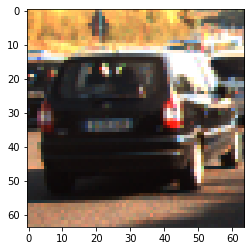


Sample dogs image:


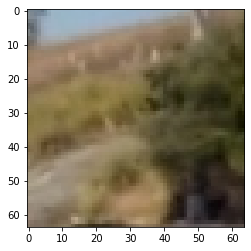

In [23]:
print("Sample vehicles image:")
plt.imshow(load_img(f"{os.path.join(training_vehicles_dir, os.listdir(training_vehicles_dir)[2])}"))
plt.show()

print("\nSample dogs image:")
plt.imshow(load_img(f"{os.path.join(training_non_vehicles_dir, os.listdir(training_non_vehicles_dir)[4])}"))
plt.show()

In [26]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 0 # Index for iterating over images

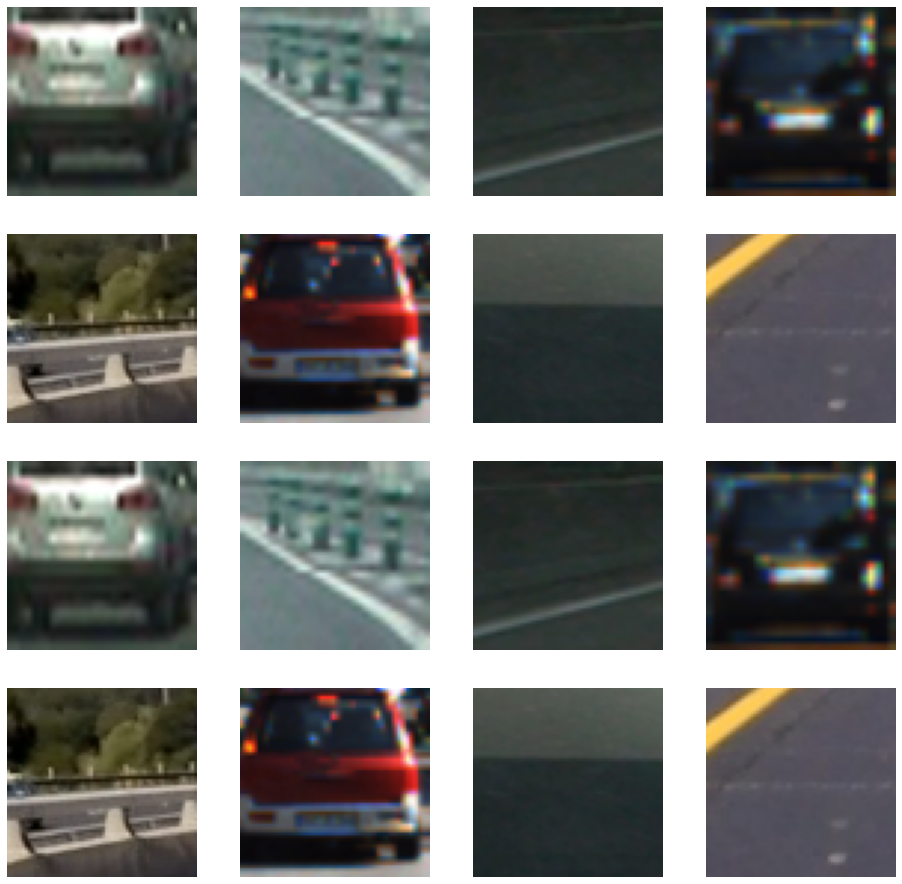

In [32]:

# Set up matplotlib fig, and size it to fit 4x4 pics

fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_vehicles_pix = [os.path.join(training_vehicles_dir, fname) 
                for fname in training_vehicles_name[ pic_index-8:pic_index] 
               ]

next_non_vehicles_pix = [os.path.join(training_non_vehicles_dir, fname) 
                for fname in training_non_vehicles_name[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_vehicles_pix+next_non_vehicles_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [34]:
img_shape = img_to_array(load_img(os.path.join(training_vehicles_dir, os.listdir(training_vehicles_dir)[2])))

In [36]:
img_shape.shape

(64, 64, 3)

In [37]:
img_shape = img_to_array(load_img(os.path.join(training_non_vehicles_dir, os.listdir(training_non_vehicles_dir)[2])))

In [38]:
img_shape.shape

(64, 64, 3)

In [39]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   horizontal_flip = True,
                                   fill_mode = 'nearest')

In [40]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [41]:
train_generator = train_datagen.flow_from_directory(
        training_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=100,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        testing_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 15983 images belonging to 2 classes.
Found 1777 images belonging to 2 classes.


In [44]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(150,150,3)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512,activation='relu'),
                                    tf.keras.layers.Dense(1,activation='sigmoid')

                                    ])

In [45]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 16)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 17, 17, 64)      

In [48]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
              loss = 'binary_crossentropy',
              metrics = ['accuracy']
              )

In [ ]:
# history = model.fit(train_generator,epochs=20,validation_data= validation_generator,validation_steps=20,
#                     verbose= 2)

In [66]:
def model_functional():
  input_layer = tf.keras.Input(shape=(150,150,3))
  first_hidden = layers.Conv2D(16,(3,3),activation='relu')(input_layer)
  first_pool = layers.MaxPooling2D((2,2))(first_hidden)
  sec_hidden =  layers.Conv2D(32,(3,3),activation='relu')(first_pool)
  flatten = layers.Flatten()(sec_hidden)
  dense1 = layers.Dense(512,activation='relu')(flatten)
  output = layers.Dense(1,activation='sigmoid')(dense1)

  func_model  = Model(inputs=input_layer, outputs = output)
  return func_model


In [67]:
model = model_functional()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d_14 (Conv2D)          (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 74, 74, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 72, 72, 32)        4640      
                                                                 
 flatten_5 (Flatten)         (None, 165888)            0         
                                                                 
 dense_8 (Dense)             (None, 512)               84935168  
                                                             

In [ ]:
!pip install tensorflow==2.3.0.

In [70]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Input,concatenate
from tensorflow.keras.models import Model
#from tensorflow.nn import relu
from tensorflow.python.keras.utils.vis_utils import plot_model

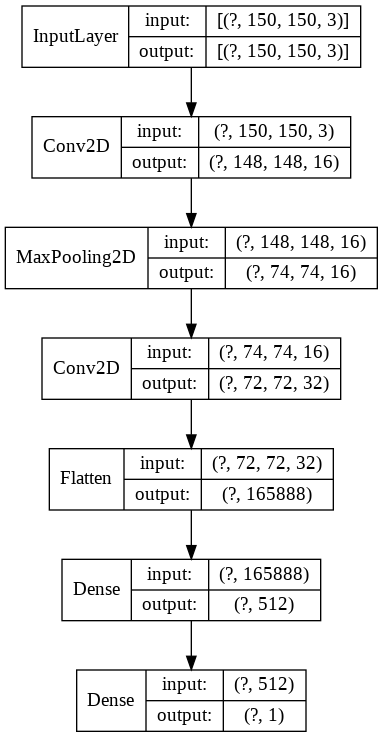

In [71]:
plot_model(model,to_file='test.png',show_shapes=True,show_layer_names=False)

In [ ]:
class MyOwnModel(Model):
    def __init__(self,units = 30 , activation = "relu" , **kwargs):
        super().__init__()
        self.hidden1 = Dense(units , activation=activation , name="hidden1")
        self.hidden2 = Dense(units , activation=activation , name="hidden2")
        self.main_output = Dense(1)
        self.aux_output = Dense(1)
    def call(self , inputs):
        input_l , input_r = inputs
        hidden1 = self.hidden1(input_r)
        hidden2 = self.hidden2(hidden1)
        concat = concatenate([input_l , hidden2])
        main_output = self.main_output(concat)
        aux_output  = self.aux_output(hidden2)
        return main_output , aux_output

model = MyOwnModel()